# **Laboratorijska vježba 2**: Zadaci za samostalni rad

## **Podaci o poznatim filmovima i njihovoj zaradi**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka o popularnim filmovima (blockbusterima) te njihov financijski učinak. Skup podataka dostupan je u *Data/blockbusters.csv*. 

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

*   Main_Genre - primarni žanr filma
*   Genre_2 
*   Genre_3
*   imdb_rating
*   length - duljina filma u minutama
*   rank_in_year - rank u top 10 filmova objavljenih te godine
*   rating - ocjena publike
*   studio - studio koji je producirao film
*   title - naslov filma
*   worldwide_gross - ukupni prihod filma u svijetu u dolarima
*   year - godina objavljivanja

In [1]:
!head Data/blockbusters.csv

Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
Action,Comedy,,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
Action,Comedy,,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
Action,Adventure,Drama,7,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'

movies = pd.read_csv(data_folder + 'blockbusters.csv')
movies.head(10)



,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
8,Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018
9,Music,Drama,NaN,8.1,135,10,R,Warner Bros,A Star is Born,"$199,721,727",2018


## **Zadatak 1: Vizualizacija jedne varijable**

Koristeći naučeno znanje, Vaš je zadatak vizualizirati jednu varijablu koristeći biblioteku Matplotlib. Usredotočite se na stupac 'worldwide_gross' te istražite njegovu distribuciju pomoću histograma i dijagrama pravokutnika. Svaki dijagram mora imati prikladno označene osi i naslov (koristite metode *plt.xlabel()*, *plt.ylabel()* i *plt.title()*). 

In [3]:
movies['worldwide_gross'] = movies['worldwide_gross'].map(lambda x: x.lstrip('$').replace(',','')).astype(float)

437
2749064328.0
34673100.0


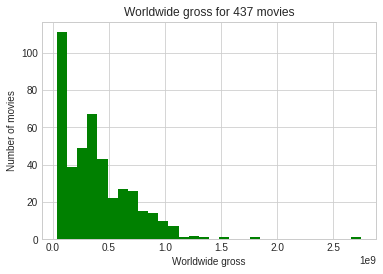

In [4]:
worldwide_gross = movies['worldwide_gross'] 
print(len(worldwide_gross))
print(worldwide_gross.max())
print(worldwide_gross.min())
plt.style.use('seaborn-whitegrid')
#worldwide_gross.plot(kind='hist',color='green')
plt.hist(worldwide_gross,color='g', bins=30)
plt.xlabel('Worldwide gross')
plt.ylabel('Number of movies')
plt.title('Worldwide gross for 437 movies')
plt.show()

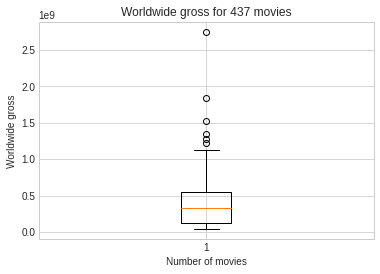

In [5]:
plt.boxplot(worldwide_gross)
plt.xlabel('Number of movies')
plt.ylabel('Worldwide gross')
plt.title('Worldwide gross for 437 movies')
plt.show()

## **Zadatak 2: Vizualizacija dviju kontinuiranih varijabli**

Provjerite ispravnost tvrdnje da blockbusteri s većim IMDB rejtingom ujedno ostvaruju i više prihoda. To možete postići vizualizacijom odnosa između dviju varijabli koje sadrže ove informacije, pri čemu je za vizualizaciju prikladno koristiti dijagram raspršenosti.

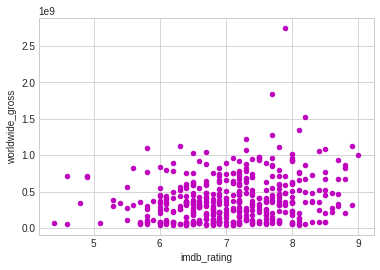

In [6]:

movies.plot.scatter(x='imdb_rating',y='worldwide_gross',color='m', s=20)
plt.show()

Na dijagram dodajte tzv. "*best-fit*" pravac koji se koristi za izražavanje odnosa različitih podatkovnih točaka u dijagramu raspršenosti. Ovaj pravac predstavlja pravac koji je najmanje udaljen od svih točaka na grafu. 

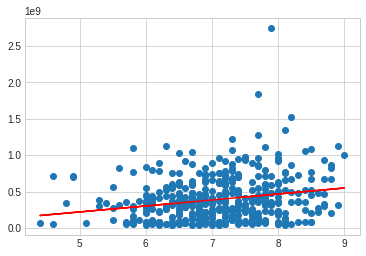

In [7]:
x = movies['imdb_rating']
y = movies['worldwide_gross']
#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b, color='r') 

Uz vizualizaciju, odnos dviju kontinuiranih varijabli možete numerički iskazati izračunavanjem korelacije. Pomoću biblioteke Pandas izračunajte korelaciju između ovih varijabli te ju ispravno protumačite.

In [8]:
correlation = x.corr(y)
correlation

0.21325728109060602

Uz odnos ovih dviju varijabli, bilo bi zanimljivo prikazati i razlike u njihovim distribucijama. Ove razlike možete vizualizirati zajedničkim dijagramom (jointplot iz biblioteke Seaborn) koji ujedno prikazuje njihov dijagram raspršenosti te distribucije pomoću stupčastih dijagrama. Prokomentirajte razliku u distribucijama ovih dviju varijabli.

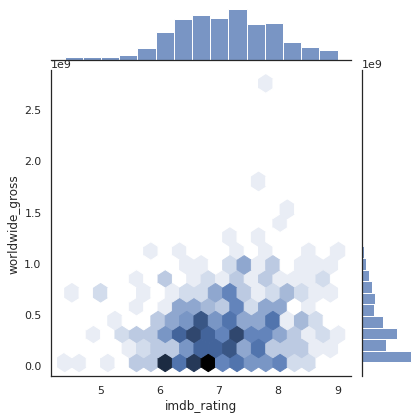

In [9]:
import seaborn as sns
sns.set()

data= {'imdb_rating': x,
       'worldwide_gross': y}
# Create DataFrame
df = pd.DataFrame(data)

#data = np.random.multivariate_normal([0,0,], [[5,2], [5,2]], size=2000)
#data = pd.DataFrame(data, columns=['x', 'y'])

with sns.axes_style('white'):
  sns.jointplot(data=df, x='imdb_rating', y='worldwide_gross', kind='hex')

## **Zadatak 3: Vizualizacija odnosa kontinuirane i kategoričke varijable**

Razmotrite pet najzastupljenijih žanrova te ispitajte njihove prihode. Vizualizirajte odnos između ovih varijabli koristeći stupčasti dijagram, dijagram pravokutnika te violinske dijagrame. 

{'Action': 185, 'Adventure': 202, 'Animation': 62, 'Comedy': 157, 'Crime': 42, 'Drama': 125, 'Family': 39, 'Fantasy': 66, 'History': 8, 'Horror': 14, 'Music': 15, 'Romance': 52, 'Sci-Fi': 63, 'Sport': 7, 'Thriller': 64, 'War': 11, 'Documentary': 2, 'Musical': 2, 'Mystery': 13, 'Western': 8, 'Biography': 4}
{'Adventure': 202, 'Action': 185, 'Comedy': 157, 'Drama': 125, 'Fantasy': 66, 'Thriller': 64, 'Sci-Fi': 63, 'Animation': 62, 'Romance': 52, 'Crime': 42, 'Family': 39, 'Music': 15, 'Horror': 14, 'Mystery': 13, 'War': 11, 'History': 8, 'Western': 8, 'Sport': 7, 'Biography': 4, 'Documentary': 2, 'Musical': 2}


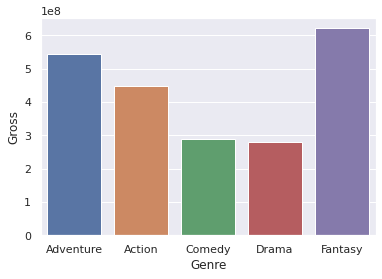

In [10]:
movies_grouped_genres1 = movies.groupby('Main_Genre')
movies_grouped_genres2 = movies.groupby('Genre_2')
movies_grouped_genres3 = movies.groupby('Genre_3')
genres ={}

for group,mg in movies_grouped_genres1:
  genres[f"{group}"]=0
for group,mg in movies_grouped_genres2:
  genres[f"{group}"]=0
for group,mg in movies_grouped_genres3:
  genres[f"{group}"]=0

for group,mg in movies_grouped_genres1:
  genres[f"{group}"]+=len(mg)

for group,mg in movies_grouped_genres2:
  genres[f"{group}"]+=len(mg)
 

for group,mg in movies_grouped_genres3:
  genres[f"{group}"]+=len(mg)
  
sorted_genres = sorted(genres.items(),key=lambda x:x[1], reverse = True) # 1 je index vrijednosti, reverse = True da bude DESC i vratio je listu tuple-ova
sorted_genres = dict(sorted_genres)
print(genres)
print(sorted_genres)

genre1_gross_mean = movies[(movies['Main_Genre']=='Adventure') | (movies['Genre_2']=='Adventure') | (movies['Genre_3']=='Adventure')]['worldwide_gross'].mean()
genre2_gross_mean = movies[(movies['Main_Genre']=='Action') | (movies['Genre_2']=='Action') | (movies['Genre_3']=='Action')]['worldwide_gross'].mean()
genre3_gross_mean = movies[(movies['Main_Genre']=='Comedy') | (movies['Genre_2']=='Comedy') | (movies['Genre_3']=='Comedy')]['worldwide_gross'].mean()
genre4_gross_mean = movies[(movies['Main_Genre']=='Drama') | (movies['Genre_2']=='Drama') | (movies['Genre_3']=='Drama')]['worldwide_gross'].mean()
genre5_gross_mean = movies[(movies['Main_Genre']=='Fantasy') | (movies['Genre_2']=='Fantasy') | (movies['Genre_3']=='Fantasy')]['worldwide_gross'].mean()

genre_data = { 'Adventure':genre1_gross_mean, 'Action':genre2_gross_mean, 'Comedy':genre3_gross_mean, 'Drama':genre4_gross_mean, 'Fantasy':genre5_gross_mean}
#genres_gross = pd.DataFrame.from_dict(genre_data,orient='index', columns=['Gross'])
genres_gross = pd.DataFrame(genre_data.items(), columns=['Genre', 'Gross'])
genres_gross
ax = sns.barplot(x='Genre', y='Gross', data=genres_gross)



{'Action': 30, 'Adventure': 13, 'Animation': 22, 'Comedy': 55, 'Crime': 17, 'Drama': 30, 'Family': 16, 'Fantasy': 54, 'History': 5, 'Horror': 8, 'Music': 9, 'Romance': 48, 'Sci-Fi': 50, 'Sport': 7, 'Thriller': 63, 'War': 10}
[('Thriller', 63), ('Comedy', 55), ('Fantasy', 54), ('Sci-Fi', 50), ('Romance', 48), ('Action', 30), ('Drama', 30), ('Animation', 22), ('Crime', 17), ('Family', 16), ('Adventure', 13), ('War', 10), ('Music', 9), ('Horror', 8), ('Sport', 7), ('History', 5)]


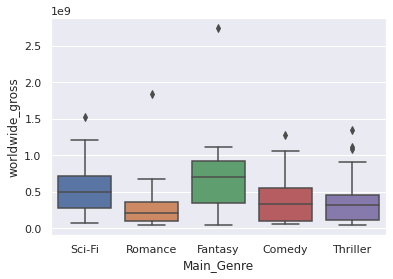

In [11]:
genres_main = {}
for group,mg in movies_grouped_genres1:
  genres_main[f"{group}"]=0
for group,mg in movies_grouped_genres1:
  genres_main[f"{group}"]+=len(mg)

print(genres_main)
sorted_genres_main = sorted(genres_main.items(),key=lambda x:x[1], reverse = True)
print(sorted_genres_main)

top5_genres = ["Thriller", "Comedy","Fantasy", "Sci-Fi", "Romance"]
top_genre_movies = movies[(movies['Main_Genre'].isin(top5_genres)) ]#| (movies['Genre_2'].isin(top5_genres)) | (movies['Genre_3'].isin(top5_genres))
top_genre_movies
ax = sns.boxplot(x='Main_Genre', y='worldwide_gross', data=top_genre_movies)#genre_gross
movies_grouped_genres1

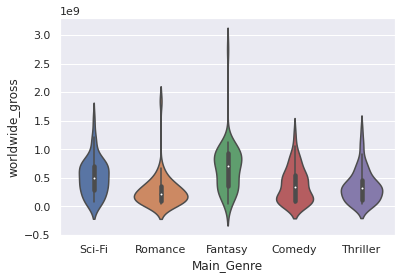

In [12]:
# za main genre filmova 
ax = sns.violinplot(x='Main_Genre', y='worldwide_gross', data=top_genre_movies)

## **Zadatak 4: Vizualizacija neizvjesnosti**

Pokušajte odgovoriti na pitanje kako bi se kretao prosječni prihod od blockbustera? Vizualizirajte prosječni godišnji svjetski bruto prihod, zajedno sa standardnom devijacijom. Devijaciju možete vizualizirati pomoću vizualizacije grešaka, odnosno metoda *errorbar* i *fill_between* iz biblioteke Matplotlib. Pomoć: grupirajte retke DataFrame-a prema godini te primijenite prikladnu metodu agregacije nad stupcem od interesa.

Je li se prosječni prihod povećao ili smanjio tijekom vremena? Što opažate?

Int64Index([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
            1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='year')


<ErrorbarContainer object of 3 artists>

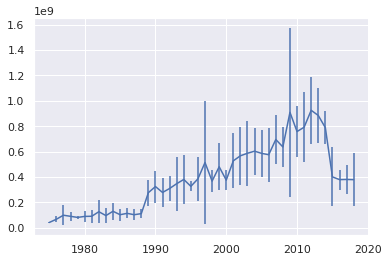

In [77]:
years = movies.groupby(movies.year)
yerr = years['worldwide_gross'].std()
y = years['worldwide_gross'].mean()
x = years['worldwide_gross'].mean().index
print(x)
#print(y)
#print(yerr)
plt.errorbar(x, y, yerr)#mfc='red',mec='green' marker='s', ms=20, mew=4

## **Zadatak 5: Stvaranje višestrukih dijagrama**

Nadalje, pokušajmo razumjeti koliko dugo blockbusteri traju u različitim žanrovima. Kad radite s velikim brojem kategorija (postoji 16 žanrova u skupu podataka), vizualizacije se lako zatrpaju i postaju nepregledne. Tada je korisno grupirati dijagrame u višestruke dijagrame. 

Napravite višestruki dijagram koji se sastoji od mreže od 4x4 dijagrama za 16 filmskih žanrova. U svakom poddijagramu prikažite histogram s distribucijom duljine filma za različite kategorije. Odgovorite na pitanje kojim žanrovima pripadaju najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

['Thriller', 'Comedy', 'Fantasy', 'Sci-Fi', 'Romance', 'Action', 'Drama', 'Animation', 'Crime', 'Family', 'Adventure', 'War', 'Music', 'Horror', 'Sport', 'History']


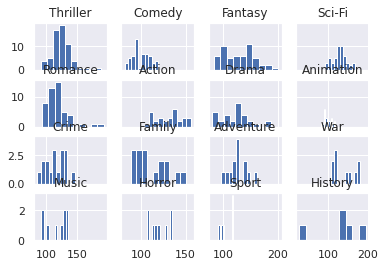

In [62]:
time = movies['length']
movies_genres = movies['Main_Genre'].value_counts()
movies_genres = list(movies_genres.keys())
print(movies_genres)
fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')
#plt.subplot_tool() #.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i in range(4):
  for j in range(4):
    g = movies_genres[4*i+j]
    ax[i,j].hist( x=movies.query('Main_Genre == @g').length)
    ax[i,j].set_title(g)
    
 


## **Zadatak 6: Toplinske karte (Heatmaps)**

Zadnje što nas zanima jest koji filmski studiji izrađuju blockbustere za koji žanr. Postoji mnogo studija i mnogo žanrova. Pri radu s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s posebnim dijagramom (kao što je stupčasti dijagram ili dijagram pravokutnika). U tom slučaju, postaje korisno predstaviti njihov odnos pomoću toplinske karte, gdje brojevi predstavljaju broj kombinacija koji se pojavljuje u skupu podataka. 

Vizualizirajte broj blockbustera koje je napravio svaki studio za svaki žanr. Pomoć: koristite metodu *heatmap()* iz biblioteke Seaborn.

<AxesSubplot:xlabel='Main_Genre', ylabel='studio'>

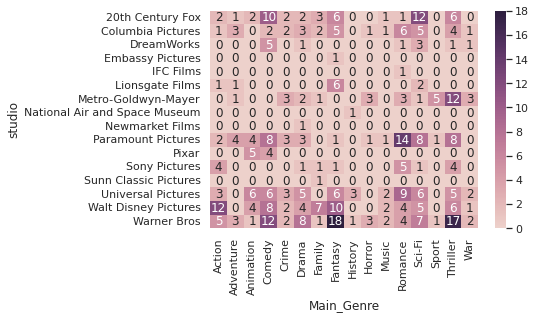

In [72]:
values = pd.crosstab(movies['studio'], movies['Main_Genre']) 


#movie_studios = sns.load_dataset("movies").pivot("studio", "Main_Genre")
sns.heatmap(values,annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

Pomoću izrađene vizualizacije, pokušajte odgovoriti na sljedeća pitanja:

*   U koje žanrove spada većina filmova koje snima studio Warner Bros?
*   Koji je najuspješniji žanr filmskih filmova Walta Disneya?
*   Koji je studio napravio najveći broj ljubavnih blockbustera?

